In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, error_rates

ImportError: cannot import name 'error_rates' from 'sklearn.metrics' (C:\Users\Anchal\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
wine_df = pd.read_csv('clean_data.csv', index_col = 0)

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,wine,best quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,-0.002202,3.51,-0.579818,2.240710,0,1
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,-0.003205,3.20,-0.385662,2.282382,0,1
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,-0.003005,3.26,-0.430783,2.282382,0,1
3,1.962001,-1.272966,0.56,0.641854,-2.590267,2.833213,-0.002002,3.16,-0.544727,2.282382,0,1
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,-0.002202,3.51,-0.579818,2.240710,0,1


In [4]:
wine_df['best quality'].value_counts()

1    6251
0     246
Name: best quality, dtype: int64

In [5]:
X = wine_df.drop(['best quality'], axis = 1)
y = wine_df['best quality']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components = 0.95)
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 40)

In [9]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = score(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train.values.ravel())
preds = knn_model.predict(X_test)

In [10]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9307692307692308,
 'recall': 0.9568345323741008,
 'precision': 0.9708029197080292,
 'f1score': 0.963768115942029}

In [11]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9615384615384616,
 'recall': 0.9984012789768185,
 'precision': 0.9629915188897455,
 'f1score': 0.9803767660910518}

In [25]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []
error_rates=[]
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
    error = 1-round(accuracy_score(y_test,preds), 4)
    error_rates.append((k, error))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9758
2,0.9638
3,0.9783
4,0.9747
5,0.9804
6,0.9800
7,0.9808
8,0.9808
9,0.9812


Text(0.5, 1.0, 'KNN F1 Score')

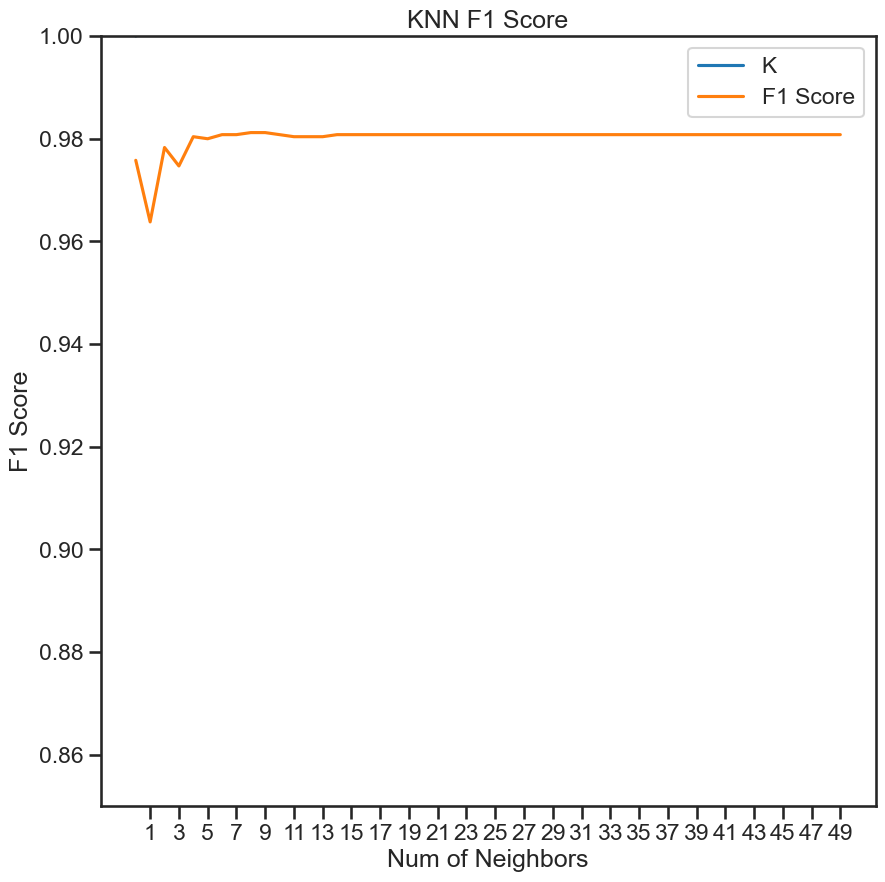

In [21]:
ax = f1_results.plot(figsize=(10, 10))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

<Figure size 1920x1440 with 0 Axes>

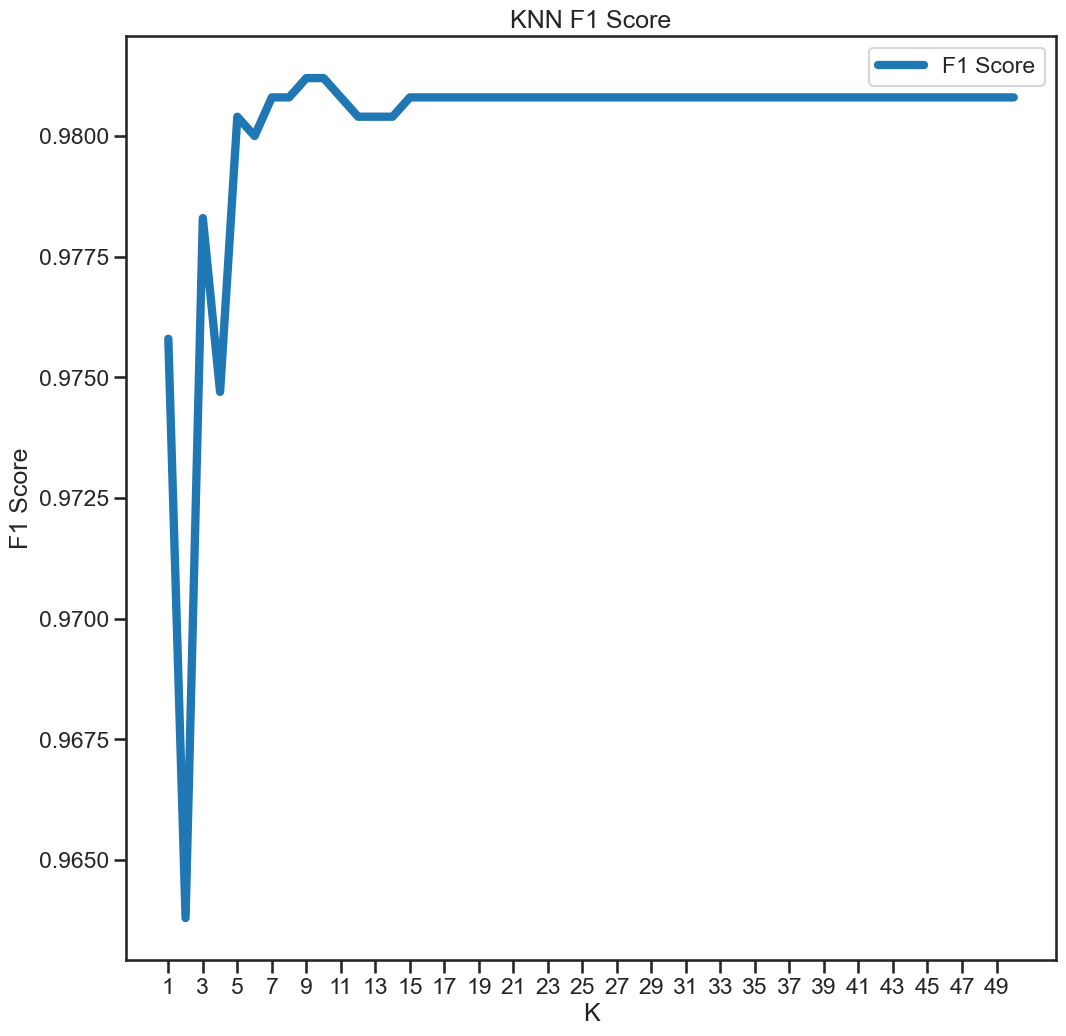

In [16]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

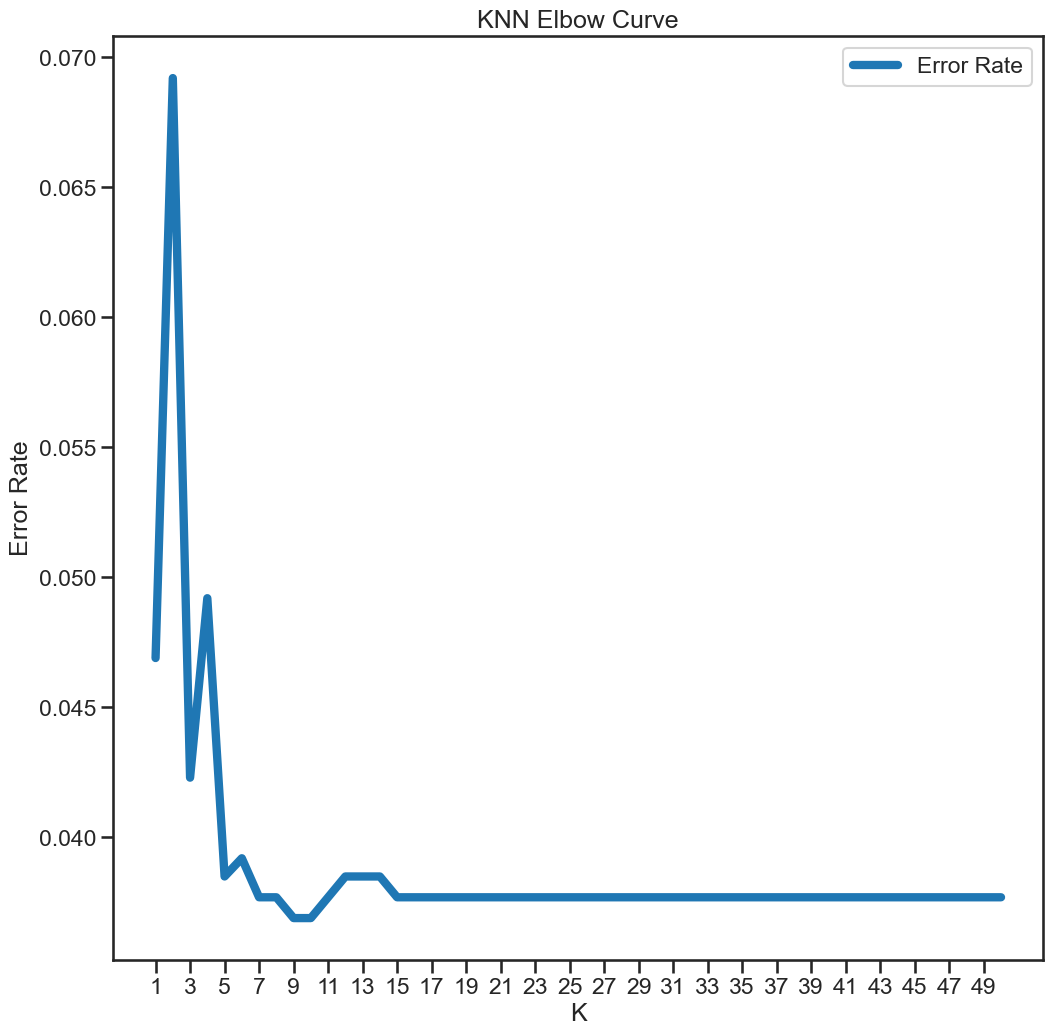

In [26]:
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')